# Computer Vision


### Data Decsritpion
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


### Context
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Guide to solve the project seamlessly
Here are the points which will help you to solve the problem efficiently:
1. Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
2. Download the dataset from the Olympus platform.
3. Upload the "images.npy" and “Labels.csv” file to google drive.
4. Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
5. You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

#### Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

Mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [3]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

Loading data set

In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Labels.csv')  

In [5]:
data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


Printing shape of data

In [6]:
data.shape

(4750, 1)

In [9]:
data.isnull().sum()

Label    0
dtype: int64

There is no missing values in the dataset


Visualizing the images in dataset

In [12]:
from google.colab import files
uploaded = files.upload()

Saving images.npy to images.npy


In [14]:
from PIL import Image
from numpy import asarray
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/images.nyp')

In [17]:
print('Image Matrix: \n', image)
print(type(image))

Image Matrix: 
 None
<class 'NoneType'>


#### Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.

Normalization - Performing a grayscale normalization to reduce the effect of illumination's differences.

In [58]:
y = data["Label"]

KeyError: ignored

In [19]:
X = data

In [26]:
file_path = '/content/drive/My Drive/Colab Notebooks/data/images.nyp'

In [27]:
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

In [34]:
data['Label'] = data['Label'].astype(float)

ValueError: ignored

In [36]:
i=1
image = X[i]
image = image.reshape((28,28))
plt.imshow(image, cmap='gray')
plt.title(y[i])

KeyError: ignored

In [59]:
i=100                             
image = X[i]                        
image = image.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(image, cmap='gray');

KeyError: ignored

Gaussian Blurring

In [37]:
print(len(X))
print(X.shape)

4750
(4750, 1)


In [38]:
new_x = np.empty((4750, 1, 1)) 

In [39]:
new_x.shape

(4750, 1, 1)

In [43]:
for idx, image in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(image, (5, 5), 0)

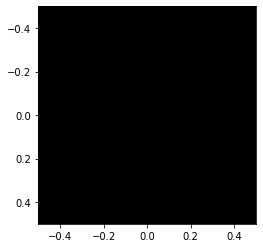

In [44]:
plt.imshow(new_x[1], cmap='gray')

In [46]:
X_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(image, (5, 5), 0), 
    -1, 
    X.reshape((-1, 28, 28))
)
X_new = X_new.reshape((-1, 28, 28))
plt.imshow(X_new[3], cmap='gray')

AttributeError: ignored

In [47]:
data = pd.DataFrame({'A' : np.random.randn(8),
                   'B' : np.random.randn(8),
                   'C' : np.random.randn(8)})
data

,A,B,C
0,-0.200499,-0.159900,-0.136105
1,0.620532,-1.044520,1.969779
2,-0.342115,-1.165885,-0.266994
3,0.708668,0.544997,0.276116
4,1.148777,0.271877,0.146185
5,0.241325,-1.656551,-0.811057
6,-0.394506,0.198287,-0.971101
7,0.477165,-2.169712,0.785286


In [48]:
data.apply(lambda row: row.mean(), axis=1)

0   -0.165501
1    0.515264
2   -0.591665
3    0.509927
4    0.522280
5   -0.742094
6   -0.389107
7   -0.302420
dtype: float64

In [51]:
another_x = np.empty((4750, 1))

In [52]:
for idx, image in enumerate(new_x):
  another_x[idx] = image.flatten()

Examining the Pixel Values

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

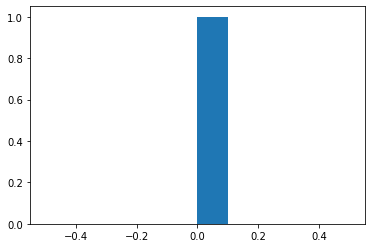

In [53]:
plt.hist(another_x[1])

#### Make data compatible: (10 Marks)
1. Convert labels to one-hot-vectors.
2. Print the label for y_train[0].
3. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
4. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [87]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
y = [0, 1, 2, 3]
pd.get_dummies(y)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [88]:
y_train[0]

array([6], dtype=uint8)

In [61]:
X = X.values 
y = y.values

NameError: ignored

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

NameError: ignored

In [63]:
type(X_train)

NameError: ignored

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

NameError: ignored

In [64]:
clf.score(X_test, y_test)

NameError: ignored

In [65]:
y_pred = clf.predict(X_test)

NameError: ignored

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='d')

NameError: ignored

In [69]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===


NameError: ignored

Gaussian Blurring in Pre-Processing

In [72]:
print(len(X))
print(X.shape)

4750
(4750, 1)


In [73]:
new_x = np.empty((4750, 1, 1))

In [74]:
X[0].shape 

(1,)

In [75]:
for idx, line in enumerate(X):
  new_x[idx] = line.reshape((1, 1))

ValueError: ignored

In [76]:
lst = ['a', 'b', 'c']
for idx, item in enumerate(lst):
  print(idx, item)

0 a
1 b
2 c


In [77]:
new_x.shape

(4750, 1, 1)

In [78]:
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (10, 10), 0)

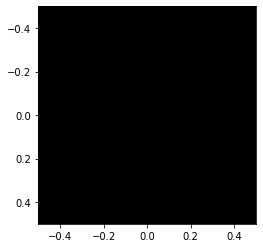

In [79]:
plt.imshow(new_x[1], cmap='gray')

#### Building CNN: (15 Marks)
1. Define layers.
2. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [89]:
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [90]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [91]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [93]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 
x_test /= 255.0

#### Fit and evaluate model and print confusion matrix. (10 Marks)

In [95]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [98]:
x_train = x_train.reshape(x_train.shape[0], 20, 20, 3)
x_test = x_test.reshape(x_test.shape[0], 20, 20, 3)

print(x_train.shape)
print(x_test.shape)

ValueError: ignored

In [99]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

NameError: ignored

In [100]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

ValueError: ignored

In [83]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===


NameError: ignored

#### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)